In [251]:
# MANE 4962 Homework 4 Question 2
# Name: Calvin Chan

In [252]:
# Load Modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 

In [253]:
# Read Datafile 
filename = 'airfoil_self_noise.dat'
airfoil_data = pd.read_csv(filename, delimiter = '\t', header = None)
airfoil_data.columns = ['frequency (Hz)', 'attack-angle (deg)', 'chord-length (m)', 'free-stream-velocity (m/s)', 
                        'suction-side-displacement-thickness (m)', 'scaled-sound-pressure (dB)']
display(airfoil_data) # Display Data

,frequency (Hz),attack-angle (deg),chord-length (m),free-stream-velocity (m/s),suction-side-displacement-thickness (m),scaled-sound-pressure (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


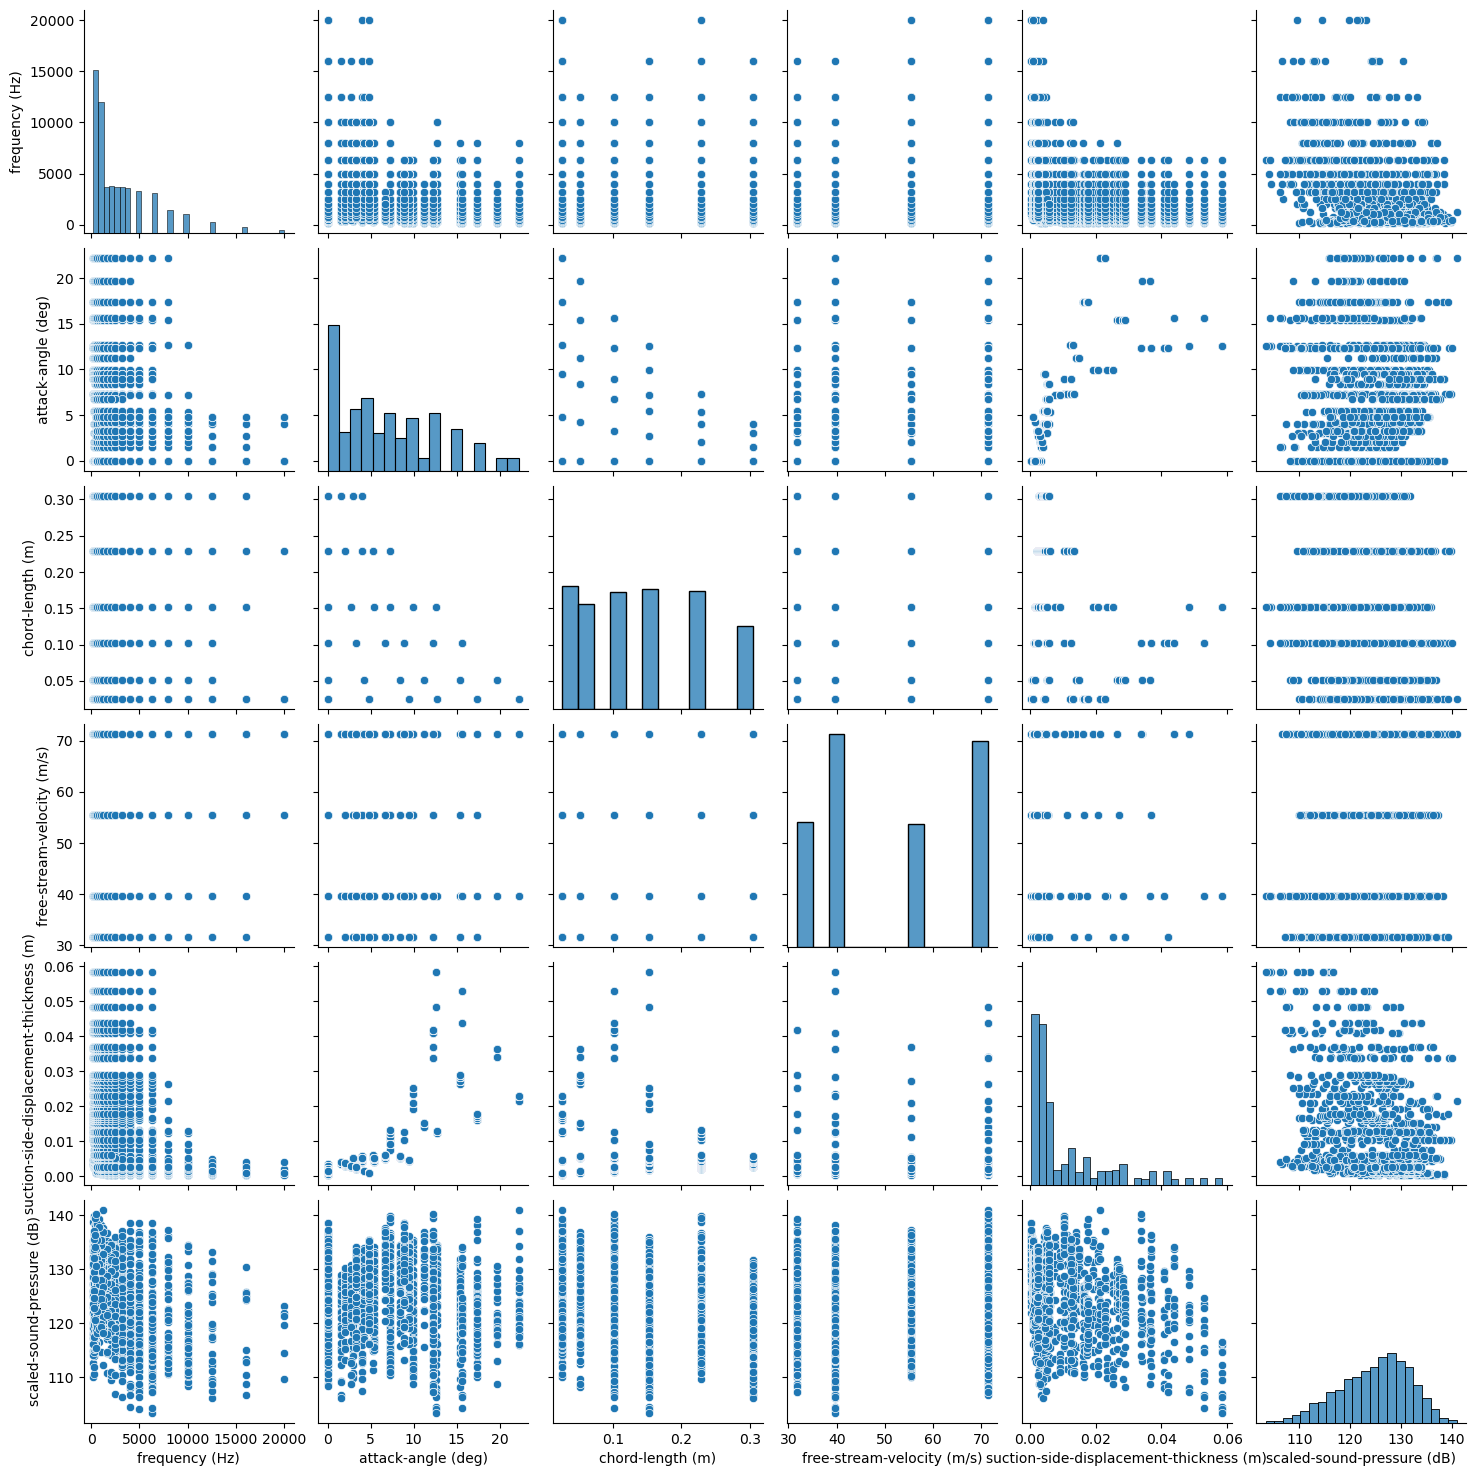

In [254]:
# Question 2a:
# Visualize the dataset using PairPlot
sns.pairplot(airfoil_data)
plt.show()

In [255]:
# Question 2b:
#  Construct a fully connected neural network model for estimating scaled sound pressure level, in decibels, from the attributes by choosing a 70%-30%
# split. 

# Data-Modification
X = airfoil_data.iloc[:,0:5].values
y = airfoil_data.iloc[:,5].values

# Normalize Data 
# We will need to normalize the data since the ranges of the features/attributes have huge ranges (espically frequency)
for i in range(X.shape[1]):
    X[:,i] = X[:,i]/X[:,i].max()

# Display Data
display(X) 
display(y)
display(X.shape) 
display(y.shape)

array([[0.04      , 0.        , 1.        , 1.        , 0.04559683],
       [0.05      , 0.        , 1.        , 1.        , 0.04559683],
       [0.0625    , 0.        , 1.        , 1.        , 0.04559683],
       ...,
       [0.2       , 0.7027027 , 0.33333333, 0.55539972, 0.90476843],
       [0.25      , 0.7027027 , 0.33333333, 0.55539972, 0.90476843],
       [0.315     , 0.7027027 , 0.33333333, 0.55539972, 0.90476843]])

array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204])

(1503, 5)

(1503,)

In [256]:
# Spliting Dataset to 70/30 Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.30,
    train_size=0.70)

# Display Data
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (1052, 5)
X_test shape : (451, 5)
y_train shape : (1052,)
y_test shape : (451,)


In [257]:
# Construct Neural Network
model = Sequential()
model.add(keras.Input(shape = (5,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate = 0.001) # Optimizer = ADAM
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['accuracy']) # Mean Squared Error = Loss
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 200)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,801 (319.54 KB)

 Trainable params: 81,801 (319.54 KB)

 Non-trainable params: 0 (0.00 B)

In [258]:
# Fit the model 
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 2)
# Note: Running more epochs increase accuracy

Epoch 1/50
33/33 - 2s - 63ms/step - accuracy: 0.0000e+00 - loss: 13874.3301 - val_accuracy: 0.0000e+00 - val_loss: 8535.7119
Epoch 2/50
33/33 - 0s - 7ms/step - accuracy: 0.0000e+00 - loss: 2289.0447 - val_accuracy: 0.0000e+00 - val_loss: 654.6399
Epoch 3/50
33/33 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: 568.6297 - val_accuracy: 0.0000e+00 - val_loss: 475.0772
Epoch 4/50
33/33 - 0s - 11ms/step - accuracy: 0.0000e+00 - loss: 423.4201 - val_accuracy: 0.0000e+00 - val_loss: 358.2183
Epoch 5/50
33/33 - 0s - 9ms/step - accuracy: 0.0000e+00 - loss: 318.6394 - val_accuracy: 0.0000e+00 - val_loss: 252.7933
Epoch 6/50
33/33 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: 219.4258 - val_accuracy: 0.0000e+00 - val_loss: 168.2240
Epoch 7/50
33/33 - 0s - 6ms/step - accuracy: 0.0000e+00 - loss: 137.3718 - val_accuracy: 0.0000e+00 - val_loss: 98.9879
Epoch 8/50
33/33 - 0s - 10ms/step - accuracy: 0.0000e+00 - loss: 78.6011 - val_accuracy: 0.0000e+00 - val_loss: 55.1522
Epoch 9/50
33/33 - 0s - 10ms

In [259]:
# Predict the Model
y_pred = model.predict(X_test) # Predicition
#Summarize the first 100 Cases
for i in range(100):
    print('Predicted: '+ str(y_pred[i]) + " => " + 'Expected: ' + str(y_test[i]))
display(y_pred.shape)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted: [123.62629] => Expected: 127.847
Predicted: [128.33943] => Expected: 134.625
Predicted: [129.45808] => Expected: 125.856
Predicted: [124.9946] => Expected: 126.616
Predicted: [116.65925] => Expected: 109.52
Predicted: [127.37507] => Expected: 127.417
Predicted: [122.89134] => Expected: 125.715
Predicted: [122.24905] => Expected: 122.315
Predicted: [130.15541] => Expected: 133.201
Predicted: [130.33546] => Expected: 117.396
Predicted: [116.63009] => Expected: 115.818
Predicted: [127.51437] => Expected: 116.066
Predicted: [126.116585] => Expected: 124.353
Predicted: [129.14992] => Expected: 130.795
Predicted: [125.3072] => Expected: 124.024
Predicted: [121.67909] => Expected: 120.189
Predicted: [118.91298] => Expected: 120.607
Predicted: [116.60841] => Expected: 117.649
Predicted: [108.577286] => Expected: 107.985
Predicted: [133.65732] => Expected: 133.378
Predicted: [128.15881] => Expected: 127.358
Predicted: [122.06899] => Expected: 11

(451, 1)

In [260]:
# Question 2c: 
# Calculate the coefficient of determination. 
R2_Test = r2_score(y_test, y_pred)
print("R2 Score for the Testing Set is:", R2_Test)

R2 Score for the Testing Set is: 0.6175066242639937
